# Algorithms Exercise 1

## Imports

In [128]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [129]:
def makelist(s):
    lines = s.splitlines()
    lst = []
    for i in lines:
        for j in i.split():
            lst.append(j)
    return lst
def fil(func,lst):
    newlist = []
    for i in lst:
        newlist.append(list(filter(func,i)))
    string = ''
    newthing=[]
    for i in newlist:
        for j in i:
            string += j
        newthing.append(string)
        string = ''
    return newthing
def inlist(lst,words):
    thing = []
    for i in lst:
        if i not in words:
            thing.append(i)
    return thing

def makelower(lst):
    thing = []
    for i in lst:
        thing.append(i.lower())
    return thing

def splitbars(lst):
    thing = []
    for i in lst:
        thing.append(i.split('-'))
    stuff = []
    for i in thing:
        for j in i:
            if j != '':
                stuff.append(j)
    return stuff

def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'):
    """Split a string into a list of words, removing punctuation and stop words."""
        
    def punc(i):
        if i in punctuation:
            return False
        else:
            return True  
    print(fil(punc,makelist(test)))  
    lst = makelist(s)
    lst = splitbars(lst)
    thing = fil(punc,lst)
    thing = makelower(thing)
    if isinstance(stop_words,list) == True:
        thing = inlist(thing,stop_words)
    if isinstance(stop_words,str) == True:
        stuff = makelist(stop_words)
        thing = inlist(thing,stuff)
    return thing     


In [130]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""
assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

['word1', 'word2word3', 'word4']
['word1', 'word2word3', 'word4']



Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [131]:
def count_words(data):
    """Return a word count dictionary from the list of words in data."""
    words = []
    count = []
    for i in data:
        words.append(i)
        count.append(data.count(i)) 
    return dict(zip(words,count))

In [132]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

['word1', 'word2word3', 'word4']


Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [133]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    def isValue(b):
        return b[1]
    a = list(wc.items())
    return sorted(a,key=isValue,reverse=True)

In [134]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

['word1', 'word2word3', 'word4']


Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [135]:
f = open("mobydick_chapter1.txt",'r')
string = ''
for i in f:
    string += i
words = tokenize(string,stop_words='the of and a to in is it that as')
wordcount = count_words(words)
swc = sort_word_counts(wordcount)

['word1', 'word2word3', 'word4']


In [145]:
assert swc[0]==('i',43)
assert len(swc)==848

AssertionError: 

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

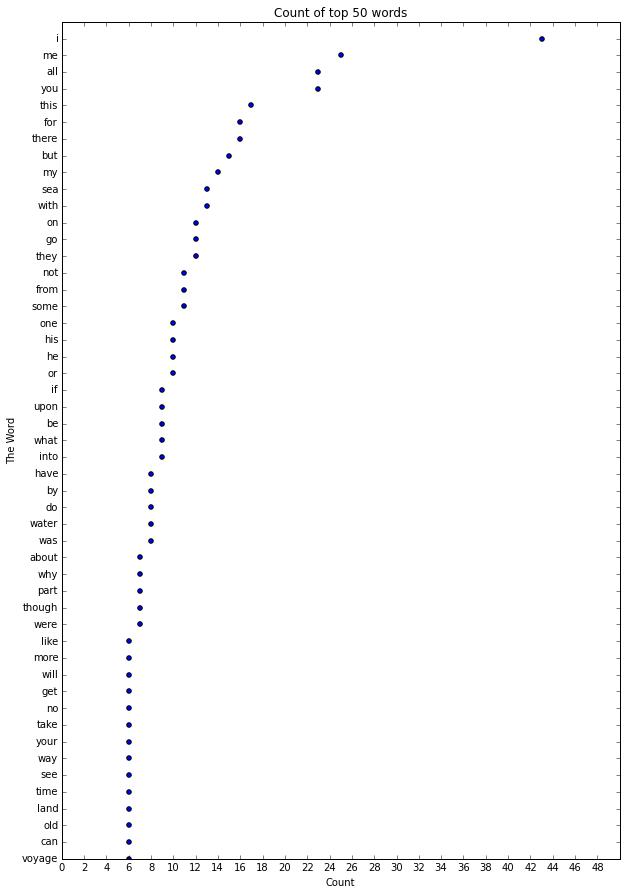

In [152]:
newswc=swc[:50]
words = []
counts = []
for i in newswc:
    words.append(i[0])
    counts.append(i[1])
wordindex=[]
for i in words:
    wordindex.append(words.index(i))
plt.figure(figsize=(10,15));
plt.scatter(counts,wordindex[::-1]);
plt.xlim(0,50)
plt.ylim(0,50)
plt.title("Count of top 50 words")
plt.xlabel("Count")
plt.ylabel("The Word")
plt.yticks([i for i in wordindex],[i for i in words[::-1]]);
plt.xticks([i for i in range(0,50,2)],[i for i in range(0,50,2)]);

In [ ]:
assert True # use this for grading the dotplot